In [1]:
import pandas as pd
import numpy as np

In [2]:
import time, os, sys

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bs = pd.read_excel('7-5-bloodsugar_fix.xlsx')
bs.head()

,유형,혈당치,날짜,시간
0,공복,126,2016-03-14,15:00:00
1,점심식사후,157,2016-03-16,14:39:00
2,공복,179,2016-03-18,15:48:00
3,저녁식사전,170,2016-03-18,17:05:00
4,아침식사후,104,2016-03-19,09:02:00


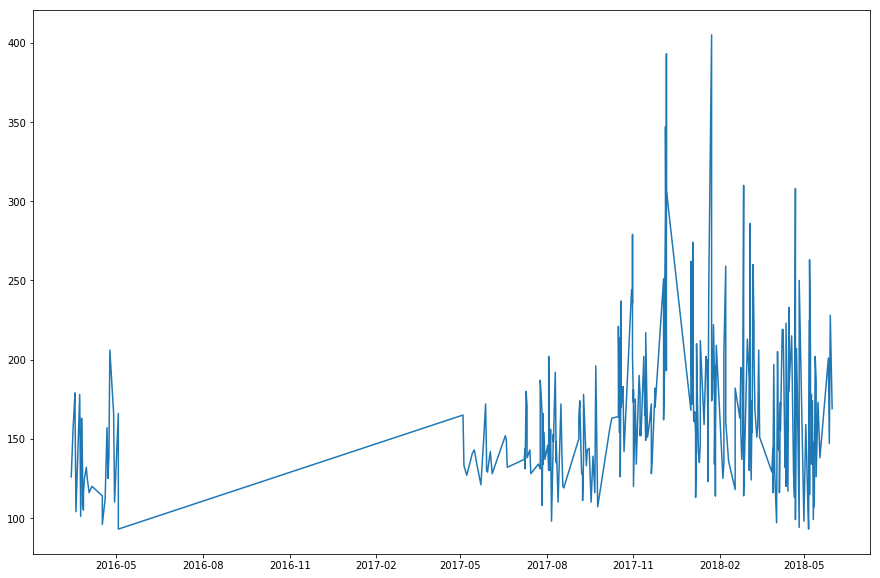

In [5]:
plt.figure(figsize=(15,10))
plt.plot(bs['날짜'],bs['혈당치'])
plt.show()

In [6]:
bs = bs[30:]

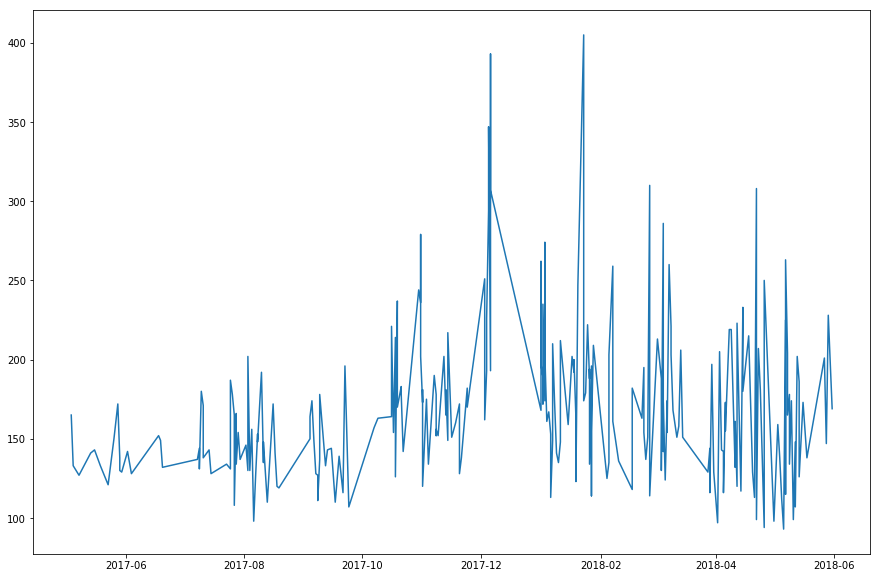

In [7]:
plt.figure(figsize=(15,10))
plt.plot(bs['날짜'],bs['혈당치'])
plt.show()

In [8]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import statsmodels.api as sm
from fbprophet import Prophet

In [ ]:
print(pd.__version__)

In [ ]:
df = pd.DataFrame({'ds':bs['날짜'], 'y':bs['혈당치']})
df.head()

In [ ]:
m = Prophet()

In [ ]:
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=10)

In [ ]:
future.tail()

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast.tail()

In [ ]:
forecast.columns

In [ ]:
future = m.make_future_dataframe(periods=10)
future['cap'] = 210
future['floor'] = 80
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [ ]:
m.plot(forecast)

In [ ]:
m.plot_components(forecast)

In [ ]:
fufure = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


## Keras 

In [9]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
bs_value = bs['혈당치'].tolist()

In [11]:
bs_value

[165,
 133,
 127,
 141,
 143,
 133,
 121,
 150,
 172,
 138,
 130,
 129,
 142,
 128,
 152,
 149,
 132,
 137,
 144,
 131,
 180,
 171,
 138,
 143,
 128,
 134,
 131,
 187,
 178,
 165,
 108,
 166,
 134,
 154,
 137,
 146,
 130,
 202,
 130,
 156,
 98,
 127,
 153,
 148,
 192,
 135,
 148,
 110,
 151,
 172,
 141,
 120,
 119,
 150,
 164,
 174,
 149,
 128,
 127,
 111,
 137,
 178,
 133,
 143,
 144,
 110,
 139,
 116,
 196,
 107,
 157,
 163,
 164,
 221,
 155,
 154,
 214,
 126,
 237,
 170,
 183,
 178,
 142,
 244,
 236,
 241,
 252,
 279,
 202,
 173,
 181,
 120,
 175,
 134,
 190,
 178,
 152,
 156,
 152,
 202,
 165,
 181,
 149,
 217,
 151,
 160,
 172,
 128,
 138,
 182,
 170,
 251,
 162,
 193,
 226,
 294,
 347,
 193,
 393,
 307,
 168,
 262,
 197,
 189,
 172,
 235,
 174,
 274,
 203,
 161,
 167,
 153,
 153,
 113,
 149,
 210,
 173,
 141,
 135,
 148,
 212,
 159,
 202,
 192,
 200,
 163,
 123,
 247,
 405,
 174,
 179,
 222,
 188,
 194,
 134,
 196,
 114,
 192,
 155,
 209,
 125,
 135,
 203,
 259,
 161,
 136,
 118,

In [12]:
bs_value = np.asarray(bs_value)

In [13]:
type(bs_value)

numpy.ndarray

In [14]:
bs_value = bs_value.reshape(251,1)

In [15]:
bs_value.shape

(251, 1)

In [16]:
look_back = 20

In [17]:
# 데이터 분리
train = bs_value[0:100]
val = bs_value[100:150]
test = bs_value[150:]

In [18]:
# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

In [19]:
# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

In [31]:
x_train

array([[165, 133, 127, ..., 137, 144, 131],
       [133, 127, 141, ..., 144, 131, 180],
       [127, 141, 143, ..., 131, 180, 171],
       ...,
       [126, 237, 170, ..., 190, 178, 152],
       [237, 170, 183, ..., 178, 152, 156],
       [170, 183, 178, ..., 152, 156, 152]])

In [23]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(80, 20)
(30, 20)
(81, 20)


In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [32]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(10,input_dim=20, activation="relu"))
model.add(Dropout(0.3))
# for i in range(2):
#     model.add(Dense(10,activation="relu"))
#     model.add(Dropout(0.3))
model.add(Dense(1))

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\util\tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


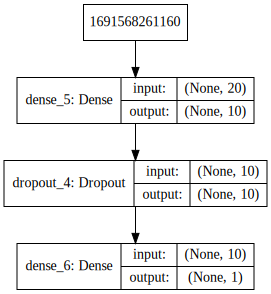

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [34]:
model.compile(loss='mean_squared_error', optimizer='adagrad')

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\util\tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [36]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=20, validation_data=(x_val, y_val))

Train on 80 samples, validate on 30 samples
Epoch 1/1000
80/80 [==============================] - 0s 212us/step - loss: 5642.5653 - val_loss: 4122.5396
Epoch 2/1000
80/80 [==============================] - 0s 224us/step - loss: 4219.9733 - val_loss: 4076.6722
Epoch 3/1000
80/80 [==============================] - 0s 187us/step - loss: 3910.6728 - val_loss: 4128.1660
Epoch 4/1000
80/80 [==============================] - 0s 249us/step - loss: 4323.1398 - val_loss: 4069.1405
Epoch 5/1000
80/80 [==============================] - 0s 249us/step - loss: 4370.4219 - val_loss: 4077.0275
Epoch 6/1000
80/80 [==============================] - 0s 274us/step - loss: 3675.5869 - val_loss: 4041.7052
Epoch 7/1000
80/80 [==============================] - 0s 199us/step - loss: 4125.2982 - val_loss: 3989.9329
Epoch 8/1000
80/80 [==============================] - 0s 287us/step - loss: 5271.1917 - val_loss: 4029.0354
Epoch 9/1000
80/80 [==============================] - 0s 200us/step - loss: 4874.6531 - val_

Epoch 76/1000
80/80 [==============================] - 0s 199us/step - loss: 5439.1081 - val_loss: 4020.2699
Epoch 77/1000
80/80 [==============================] - 0s 237us/step - loss: 3761.1170 - val_loss: 4039.5617
Epoch 78/1000
80/80 [==============================] - 0s 212us/step - loss: 5912.9504 - val_loss: 3985.7878
Epoch 79/1000
80/80 [==============================] - 0s 237us/step - loss: 3626.7951 - val_loss: 3969.0953
Epoch 80/1000
80/80 [==============================] - 0s 212us/step - loss: 3368.4667 - val_loss: 3998.6458
Epoch 81/1000
80/80 [==============================] - 0s 224us/step - loss: 4267.1708 - val_loss: 3961.6496
Epoch 82/1000
80/80 [==============================] - 0s 237us/step - loss: 4953.1395 - val_loss: 3960.8267
Epoch 83/1000
80/80 [==============================] - 0s 237us/step - loss: 4037.0258 - val_loss: 3973.3901
Epoch 84/1000
80/80 [==============================] - 0s 262us/step - loss: 4891.0614 - val_loss: 4002.6973
Epoch 85/1000
80/80

80/80 [==============================] - 0s 237us/step - loss: 3863.2750 - val_loss: 3992.0297
Epoch 151/1000
80/80 [==============================] - 0s 224us/step - loss: 3684.6551 - val_loss: 4004.2251
Epoch 152/1000
80/80 [==============================] - 0s 224us/step - loss: 3564.8771 - val_loss: 4046.8714
Epoch 153/1000
80/80 [==============================] - 0s 237us/step - loss: 5092.7806 - val_loss: 4008.2635
Epoch 154/1000
80/80 [==============================] - 0s 299us/step - loss: 4149.1414 - val_loss: 4019.1746
Epoch 155/1000
80/80 [==============================] - 0s 237us/step - loss: 3379.7582 - val_loss: 3972.6533
Epoch 156/1000
80/80 [==============================] - 0s 249us/step - loss: 4694.2700 - val_loss: 3932.6471
Epoch 157/1000
80/80 [==============================] - 0s 224us/step - loss: 5092.2015 - val_loss: 3912.4297
Epoch 158/1000
80/80 [==============================] - 0s 287us/step - loss: 4275.4940 - val_loss: 3904.8624
Epoch 159/1000
80/80 [===

80/80 [==============================] - 0s 361us/step - loss: 4250.4233 - val_loss: 3951.8631
Epoch 225/1000
80/80 [==============================] - 0s 287us/step - loss: 4143.9601 - val_loss: 3959.6382
Epoch 226/1000
80/80 [==============================] - 0s 362us/step - loss: 3514.7830 - val_loss: 3924.6743
Epoch 227/1000
80/80 [==============================] - 0s 287us/step - loss: 3116.6527 - val_loss: 3948.7151
Epoch 228/1000
80/80 [==============================] - 0s 561us/step - loss: 4981.1241 - val_loss: 3920.5429
Epoch 229/1000
80/80 [==============================] - 0s 249us/step - loss: 3570.4758 - val_loss: 3924.1172
Epoch 230/1000
80/80 [==============================] - 0s 374us/step - loss: 3460.8500 - val_loss: 3914.5466
Epoch 231/1000
80/80 [==============================] - 0s 424us/step - loss: 4954.9573 - val_loss: 3913.3084
Epoch 232/1000
80/80 [==============================] - 0s 324us/step - loss: 3382.2683 - val_loss: 3932.7879
Epoch 233/1000
80/80 [===

80/80 [==============================] - 0s 262us/step - loss: 3945.7650 - val_loss: 3970.2000
Epoch 299/1000
80/80 [==============================] - 0s 212us/step - loss: 3913.4330 - val_loss: 3981.0075
Epoch 300/1000
80/80 [==============================] - 0s 199us/step - loss: 5616.8690 - val_loss: 3959.9159
Epoch 301/1000
80/80 [==============================] - 0s 212us/step - loss: 3891.2273 - val_loss: 3976.9993
Epoch 302/1000
80/80 [==============================] - 0s 274us/step - loss: 4042.5475 - val_loss: 4007.8598
Epoch 303/1000
80/80 [==============================] - 0s 249us/step - loss: 3989.6186 - val_loss: 3964.3202
Epoch 304/1000
80/80 [==============================] - 0s 274us/step - loss: 4765.5901 - val_loss: 3989.4503
Epoch 305/1000
80/80 [==============================] - 0s 237us/step - loss: 3971.6592 - val_loss: 3957.5503
Epoch 306/1000
80/80 [==============================] - 0s 224us/step - loss: 5113.5172 - val_loss: 3970.0002
Epoch 307/1000
80/80 [===

80/80 [==============================] - 0s 249us/step - loss: 4566.8536 - val_loss: 3897.9869
Epoch 373/1000
80/80 [==============================] - 0s 175us/step - loss: 3580.8231 - val_loss: 3925.6742
Epoch 374/1000
80/80 [==============================] - 0s 175us/step - loss: 3199.3723 - val_loss: 3915.9495
Epoch 375/1000
80/80 [==============================] - 0s 199us/step - loss: 3728.1947 - val_loss: 3911.3561
Epoch 376/1000
80/80 [==============================] - 0s 187us/step - loss: 3378.8453 - val_loss: 3924.7927
Epoch 377/1000
80/80 [==============================] - 0s 249us/step - loss: 3792.5841 - val_loss: 3988.0766
Epoch 378/1000
80/80 [==============================] - 0s 262us/step - loss: 3887.2903 - val_loss: 4026.9512
Epoch 379/1000
80/80 [==============================] - 0s 274us/step - loss: 3000.2766 - val_loss: 4002.5425
Epoch 380/1000
80/80 [==============================] - 0s 312us/step - loss: 4350.7557 - val_loss: 3996.8739
Epoch 381/1000
80/80 [===

80/80 [==============================] - 0s 237us/step - loss: 4421.4583 - val_loss: 3883.1437
Epoch 447/1000
80/80 [==============================] - ETA: 0s - loss: 6708.23 - 0s 199us/step - loss: 4721.5617 - val_loss: 3892.7376
Epoch 448/1000
80/80 [==============================] - 0s 237us/step - loss: 4902.6957 - val_loss: 3929.1437
Epoch 449/1000
80/80 [==============================] - 0s 224us/step - loss: 4402.5872 - val_loss: 3961.8206
Epoch 450/1000
80/80 [==============================] - 0s 274us/step - loss: 6088.1526 - val_loss: 3943.6845
Epoch 451/1000
80/80 [==============================] - 0s 262us/step - loss: 4180.5549 - val_loss: 3987.4010
Epoch 452/1000
80/80 [==============================] - 0s 262us/step - loss: 4705.6407 - val_loss: 4000.9659
Epoch 453/1000
80/80 [==============================] - 0s 237us/step - loss: 3204.1936 - val_loss: 4020.0810
Epoch 454/1000
80/80 [==============================] - 0s 237us/step - loss: 4962.8331 - val_loss: 4058.3592

80/80 [==============================] - 0s 262us/step - loss: 4952.8351 - val_loss: 3907.5525
Epoch 521/1000
80/80 [==============================] - 0s 312us/step - loss: 5453.1440 - val_loss: 3900.2239
Epoch 522/1000
80/80 [==============================] - 0s 274us/step - loss: 4195.2844 - val_loss: 3896.9473
Epoch 523/1000
80/80 [==============================] - 0s 312us/step - loss: 4294.1218 - val_loss: 3854.6166
Epoch 524/1000
80/80 [==============================] - 0s 299us/step - loss: 4672.0812 - val_loss: 3848.7773
Epoch 525/1000
80/80 [==============================] - 0s 262us/step - loss: 5101.1957 - val_loss: 3837.4442
Epoch 526/1000
80/80 [==============================] - 0s 212us/step - loss: 5616.2227 - val_loss: 3842.2876
Epoch 527/1000
80/80 [==============================] - 0s 249us/step - loss: 4497.5755 - val_loss: 3832.9684
Epoch 528/1000
80/80 [==============================] - 0s 249us/step - loss: 4917.3752 - val_loss: 3835.5964
Epoch 529/1000
80/80 [===

80/80 [==============================] - 0s 199us/step - loss: 3875.2620 - val_loss: 3931.4414
Epoch 595/1000
80/80 [==============================] - 0s 175us/step - loss: 4012.4910 - val_loss: 3924.3939
Epoch 596/1000
80/80 [==============================] - 0s 187us/step - loss: 4158.8836 - val_loss: 3955.5998
Epoch 597/1000
80/80 [==============================] - 0s 224us/step - loss: 3514.5407 - val_loss: 3926.6571
Epoch 598/1000
80/80 [==============================] - 0s 299us/step - loss: 4302.0518 - val_loss: 3939.9133
Epoch 599/1000
80/80 [==============================] - 0s 262us/step - loss: 5034.6796 - val_loss: 3889.4243
Epoch 600/1000
80/80 [==============================] - 0s 249us/step - loss: 4799.0881 - val_loss: 3917.7255
Epoch 601/1000
80/80 [==============================] - 0s 274us/step - loss: 4544.9030 - val_loss: 3946.3167
Epoch 602/1000
80/80 [==============================] - 0s 249us/step - loss: 4938.0618 - val_loss: 3931.0060
Epoch 603/1000
80/80 [===

80/80 [==============================] - 0s 237us/step - loss: 3368.3100 - val_loss: 3977.5121
Epoch 669/1000
80/80 [==============================] - 0s 249us/step - loss: 5445.8600 - val_loss: 4003.6611
Epoch 670/1000
80/80 [==============================] - 0s 237us/step - loss: 4579.8633 - val_loss: 4019.6360
Epoch 671/1000
80/80 [==============================] - 0s 324us/step - loss: 3754.0594 - val_loss: 4014.3637
Epoch 672/1000
80/80 [==============================] - 0s 287us/step - loss: 5399.5516 - val_loss: 4027.0356
Epoch 673/1000
80/80 [==============================] - 0s 274us/step - loss: 5008.2460 - val_loss: 4001.5050
Epoch 674/1000
80/80 [==============================] - 0s 237us/step - loss: 4266.9225 - val_loss: 4029.3826
Epoch 675/1000
80/80 [==============================] - 0s 249us/step - loss: 4215.2191 - val_loss: 3994.8360
Epoch 676/1000
80/80 [==============================] - 0s 224us/step - loss: 5277.8878 - val_loss: 3981.6147
Epoch 677/1000
80/80 [===

80/80 [==============================] - 0s 199us/step - loss: 5750.5853 - val_loss: 3952.9332
Epoch 743/1000
80/80 [==============================] - 0s 175us/step - loss: 3320.9847 - val_loss: 3963.2021
Epoch 744/1000
80/80 [==============================] - 0s 187us/step - loss: 4506.0049 - val_loss: 3933.7445
Epoch 745/1000
80/80 [==============================] - 0s 187us/step - loss: 4642.6288 - val_loss: 3910.4976
Epoch 746/1000
80/80 [==============================] - 0s 199us/step - loss: 3284.0547 - val_loss: 3883.6958
Epoch 747/1000
80/80 [==============================] - 0s 187us/step - loss: 4297.0803 - val_loss: 3887.6577
Epoch 748/1000
80/80 [==============================] - 0s 237us/step - loss: 5200.1619 - val_loss: 3874.1577
Epoch 749/1000
80/80 [==============================] - 0s 212us/step - loss: 4285.6426 - val_loss: 3877.6701
Epoch 750/1000
80/80 [==============================] - 0s 274us/step - loss: 4831.9616 - val_loss: 3846.1834
Epoch 751/1000
80/80 [===

80/80 [==============================] - 0s 274us/step - loss: 3876.0469 - val_loss: 3886.1554
Epoch 817/1000
80/80 [==============================] - 0s 199us/step - loss: 4482.4460 - val_loss: 3924.4736
Epoch 818/1000
80/80 [==============================] - 0s 199us/step - loss: 4452.9376 - val_loss: 3917.1138
Epoch 819/1000
80/80 [==============================] - 0s 237us/step - loss: 5426.2684 - val_loss: 3900.5334
Epoch 820/1000
80/80 [==============================] - 0s 199us/step - loss: 4578.0649 - val_loss: 3902.8973
Epoch 821/1000
80/80 [==============================] - 0s 212us/step - loss: 3243.6952 - val_loss: 3900.0905
Epoch 822/1000
80/80 [==============================] - 0s 262us/step - loss: 4517.8190 - val_loss: 3892.5072
Epoch 823/1000
80/80 [==============================] - 0s 262us/step - loss: 3513.8879 - val_loss: 3896.1561
Epoch 824/1000
80/80 [==============================] - 0s 249us/step - loss: 3360.5482 - val_loss: 3867.1086
Epoch 825/1000
80/80 [===

80/80 [==============================] - 0s 212us/step - loss: 4473.8350 - val_loss: 3919.0466
Epoch 891/1000
80/80 [==============================] - 0s 162us/step - loss: 3028.5706 - val_loss: 3930.4438
Epoch 892/1000
80/80 [==============================] - 0s 212us/step - loss: 4514.7577 - val_loss: 3949.1191
Epoch 893/1000
80/80 [==============================] - 0s 224us/step - loss: 4056.2377 - val_loss: 3924.7962
Epoch 894/1000
80/80 [==============================] - 0s 249us/step - loss: 3595.6548 - val_loss: 3942.2661
Epoch 895/1000
80/80 [==============================] - 0s 237us/step - loss: 4912.3076 - val_loss: 3944.3615
Epoch 896/1000
80/80 [==============================] - 0s 187us/step - loss: 3556.8201 - val_loss: 3983.1766
Epoch 897/1000
80/80 [==============================] - 0s 237us/step - loss: 3694.9509 - val_loss: 3973.5469
Epoch 898/1000
80/80 [==============================] - 0s 224us/step - loss: 3228.4216 - val_loss: 3991.5528
Epoch 899/1000
80/80 [===

80/80 [==============================] - 0s 187us/step - loss: 4839.9932 - val_loss: 4005.7769
Epoch 965/1000
80/80 [==============================] - 0s 212us/step - loss: 5383.2292 - val_loss: 3965.0439
Epoch 966/1000
80/80 [==============================] - 0s 199us/step - loss: 4187.2598 - val_loss: 3956.5404
Epoch 967/1000
80/80 [==============================] - 0s 237us/step - loss: 4562.0592 - val_loss: 3957.6187
Epoch 968/1000
80/80 [==============================] - 0s 237us/step - loss: 4611.8726 - val_loss: 3951.4264
Epoch 969/1000
80/80 [==============================] - 0s 237us/step - loss: 5785.1028 - val_loss: 3973.0343
Epoch 970/1000
80/80 [==============================] - 0s 237us/step - loss: 5186.7404 - val_loss: 3935.4988
Epoch 971/1000
80/80 [==============================] - 0s 237us/step - loss: 4806.0009 - val_loss: 3924.2635
Epoch 972/1000
80/80 [==============================] - 0s 199us/step - loss: 4224.3368 - val_loss: 3938.1317
Epoch 973/1000
80/80 [===

## LSTM


In [84]:
look_back = 5
train = bs_value[0:100]
val = bs_value[100:200]
test = bs_value[200:]
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [85]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(95, 5, 1)
(95, 5, 1)
(46, 5, 1)


In [86]:
model = Sequential()
model.add(LSTM(3, input_shape=(None, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))


c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\util\tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [87]:
model = Sequential()
model.add(LSTM(128, input_shape = (5, 1)))
model.add(Dense(1))

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\util\tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


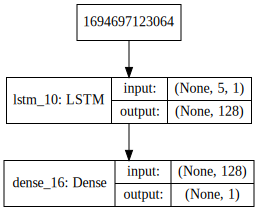

In [88]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [89]:
model.compile(loss='mean_squared_error', optimizer='adam')

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\util\tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [90]:
hist = model.fit(x_train, y_train, epochs=4000, batch_size=10, validation_data=(x_val, y_val))

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\util\tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Train on 95 samples, validate on 95 samples
Epoch 1/4000
95/95 [==============================] - 1s 14ms/step - loss: 25651.3280 - val_loss: 37221.6610
Epoch 2/4000
95/95 [==============================] - 0s 2ms/step - loss: 25336.6351 - val_loss: 36892.0068
Epoch 3/4000
95/95 [==============================] - 0s 2ms/step - loss: 25071.8238 - val_loss: 36583.5501
Epoch 4/4000
95/95 [==============================] - 0s 2ms/step - loss: 24835.1742 - val_loss: 36336.8331
Epoch 5/4000
95/95 [==============================] - 0s 2ms/step - loss: 24662.3535 - val_loss: 36197.3433
Epoch 6/4000
95/95 [==============================] - 0s 2ms/step - loss: 24559.3433 - val_loss: 36081.5559
Epoch 7/4000
95/95 [==============================] - 0s 2ms/step - loss: 24461.1084 - val_loss: 35965.3596
Epoch 8/4000
95/95 [==============================] - 0s 2ms/step - loss: 24363.9196 - val_loss: 35849.6861
Epoch 9/4000
95/95 [==============================] - 0s 2ms/step - loss: 24264.3902 - val_

Epoch 76/4000
95/95 [==============================] - 0s 2ms/step - loss: 18495.6716 - val_loss: 28809.7421
Epoch 77/4000
95/95 [==============================] - 0s 2ms/step - loss: 18418.7854 - val_loss: 28717.5774
Epoch 78/4000
95/95 [==============================] - 0s 2ms/step - loss: 18343.5274 - val_loss: 28624.8402
Epoch 79/4000
95/95 [==============================] - 0s 2ms/step - loss: 18267.0665 - val_loss: 28533.5777
Epoch 80/4000
95/95 [==============================] - 0s 2ms/step - loss: 18192.4931 - val_loss: 28441.6753
Epoch 81/4000
95/95 [==============================] - 0s 2ms/step - loss: 18117.4498 - val_loss: 28349.6876
Epoch 82/4000
95/95 [==============================] - 0s 2ms/step - loss: 18041.8512 - val_loss: 28258.4386
Epoch 83/4000
95/95 [==============================] - 0s 2ms/step - loss: 17967.2179 - val_loss: 28167.2471
Epoch 84/4000
95/95 [==============================] - 0s 2ms/step - loss: 17892.5657 - val_loss: 28075.3101
Epoch 85/4000
95/95

95/95 [==============================] - 0s 2ms/step - loss: 13464.4020 - val_loss: 22600.8693
Epoch 151/4000
95/95 [==============================] - 0s 2ms/step - loss: 13404.9759 - val_loss: 22525.2480
Epoch 152/4000
95/95 [==============================] - 0s 2ms/step - loss: 13345.2556 - val_loss: 22449.9217
Epoch 153/4000
95/95 [==============================] - 0s 2ms/step - loss: 13285.2603 - val_loss: 22374.6299
Epoch 154/4000
95/95 [==============================] - 0s 2ms/step - loss: 13225.2805 - val_loss: 22300.4252
Epoch 155/4000
95/95 [==============================] - 0s 2ms/step - loss: 13166.5477 - val_loss: 22224.4321
Epoch 156/4000
95/95 [==============================] - 0s 2ms/step - loss: 13106.5145 - val_loss: 22150.3069
Epoch 157/4000
95/95 [==============================] - 0s 2ms/step - loss: 13048.0897 - val_loss: 22075.7674
Epoch 158/4000
95/95 [==============================] - 0s 2ms/step - loss: 12988.9672 - val_loss: 22001.5388
Epoch 159/4000
95/95 [===

95/95 [==============================] - 0s 2ms/step - loss: 9539.1816 - val_loss: 17571.7876
Epoch 225/4000
95/95 [==============================] - 0s 2ms/step - loss: 9493.1284 - val_loss: 17511.2776
Epoch 226/4000
95/95 [==============================] - 0s 2ms/step - loss: 9446.3062 - val_loss: 17450.4272
Epoch 227/4000
95/95 [==============================] - 0s 2ms/step - loss: 9400.5892 - val_loss: 17388.8335
Epoch 228/4000
95/95 [==============================] - 0s 2ms/step - loss: 9354.6742 - val_loss: 17327.8241
Epoch 229/4000
95/95 [==============================] - 0s 2ms/step - loss: 9309.0826 - val_loss: 17267.7151
Epoch 230/4000
95/95 [==============================] - 0s 2ms/step - loss: 9263.2932 - val_loss: 17208.8460
Epoch 231/4000
95/95 [==============================] - 0s 3ms/step - loss: 9218.5720 - val_loss: 17149.4373
Epoch 232/4000
95/95 [==============================] - 0s 2ms/step - loss: 9173.4972 - val_loss: 17090.0740
Epoch 233/4000
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 6523.0930 - val_loss: 13508.9205
Epoch 300/4000
95/95 [==============================] - 0s 2ms/step - loss: 6487.1201 - val_loss: 13461.9424
Epoch 301/4000
95/95 [==============================] - 0s 2ms/step - loss: 6453.4424 - val_loss: 13414.4893
Epoch 302/4000
95/95 [==============================] - 0s 2ms/step - loss: 6419.8999 - val_loss: 13365.6307
Epoch 303/4000
95/95 [==============================] - 0s 3ms/step - loss: 6385.2772 - val_loss: 13318.0487
Epoch 304/4000
95/95 [==============================] - 0s 2ms/step - loss: 6351.0385 - val_loss: 13271.7712
Epoch 305/4000
95/95 [==============================] - 0s 2ms/step - loss: 6317.6353 - val_loss: 13225.1582
Epoch 306/4000
95/95 [==============================] - 0s 2ms/step - loss: 6283.7911 - val_loss: 13178.1860
Epoch 307/4000
95/95 [==============================] - 0s 2ms/step - loss: 6250.8424 - val_loss: 13130.0260
Epoch 308/4000
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 4333.7042 - val_loss: 10355.4531
Epoch 375/4000
95/95 [==============================] - 0s 2ms/step - loss: 4309.8839 - val_loss: 10318.0641
Epoch 376/4000
95/95 [==============================] - 0s 2ms/step - loss: 4285.3665 - val_loss: 10281.3229
Epoch 377/4000
95/95 [==============================] - 0s 2ms/step - loss: 4261.1277 - val_loss: 10244.9681
Epoch 378/4000
95/95 [==============================] - 0s 2ms/step - loss: 4236.9108 - val_loss: 10209.6001
Epoch 379/4000
95/95 [==============================] - 0s 2ms/step - loss: 4214.1002 - val_loss: 10173.3251
Epoch 380/4000
95/95 [==============================] - 0s 2ms/step - loss: 4189.9927 - val_loss: 10138.1811
Epoch 381/4000
95/95 [==============================] - 0s 2ms/step - loss: 4167.3733 - val_loss: 10102.3890
Epoch 382/4000
95/95 [==============================] - 0s 2ms/step - loss: 4144.0891 - val_loss: 10066.9769
Epoch 383/4000
95/95 [============

Epoch 450/4000
95/95 [==============================] - 0s 2ms/step - loss: 2832.2961 - val_loss: 7966.3216
Epoch 451/4000
95/95 [==============================] - 0s 2ms/step - loss: 2816.8082 - val_loss: 7940.0304
Epoch 452/4000
95/95 [==============================] - 0s 2ms/step - loss: 2801.5686 - val_loss: 7913.7155
Epoch 453/4000
95/95 [==============================] - 0s 2ms/step - loss: 2786.3368 - val_loss: 7887.3698
Epoch 454/4000
95/95 [==============================] - 0s 2ms/step - loss: 2771.0126 - val_loss: 7861.2816
Epoch 455/4000
95/95 [==============================] - 0s 2ms/step - loss: 2755.8415 - val_loss: 7835.8247
Epoch 456/4000
95/95 [==============================] - 0s 2ms/step - loss: 2740.9911 - val_loss: 7809.8542
Epoch 457/4000
95/95 [==============================] - 0s 2ms/step - loss: 2726.4825 - val_loss: 7782.6935
Epoch 458/4000
95/95 [==============================] - 0s 2ms/step - loss: 2710.7898 - val_loss: 7757.3306
Epoch 459/4000
95/95 [======

95/95 [==============================] - 0s 3ms/step - loss: 1931.6929 - val_loss: 6302.6237
Epoch 526/4000
95/95 [==============================] - 0s 2ms/step - loss: 1922.3784 - val_loss: 6285.5704
Epoch 527/4000
95/95 [==============================] - 0s 2ms/step - loss: 1914.0661 - val_loss: 6268.0411
Epoch 528/4000
95/95 [==============================] - 0s 2ms/step - loss: 1905.3535 - val_loss: 6250.7438
Epoch 529/4000
95/95 [==============================] - 0s 2ms/step - loss: 1897.5572 - val_loss: 6232.3068
Epoch 530/4000
95/95 [==============================] - 0s 3ms/step - loss: 1888.4531 - val_loss: 6214.8547
Epoch 531/4000
95/95 [==============================] - ETA: 0s - loss: 1832.55 - 0s 2ms/step - loss: 1880.4719 - val_loss: 6196.3507
Epoch 532/4000
95/95 [==============================] - 0s 2ms/step - loss: 1871.5986 - val_loss: 6179.4166
Epoch 533/4000
95/95 [==============================] - 0s 2ms/step - loss: 1863.7471 - val_loss: 6162.0352
Epoch 534/4000
95

Epoch 601/4000
95/95 [==============================] - 0s 2ms/step - loss: 1457.9577 - val_loss: 5197.9426
Epoch 602/4000
95/95 [==============================] - 0s 2ms/step - loss: 1453.3456 - val_loss: 5186.8891
Epoch 603/4000
95/95 [==============================] - 0s 2ms/step - loss: 1449.5790 - val_loss: 5175.1141
Epoch 604/4000
95/95 [==============================] - 0s 2ms/step - loss: 1445.0515 - val_loss: 5165.0238
Epoch 605/4000
95/95 [==============================] - 0s 2ms/step - loss: 1442.0694 - val_loss: 5152.5215
Epoch 606/4000
95/95 [==============================] - 0s 2ms/step - loss: 1437.5261 - val_loss: 5141.8250
Epoch 607/4000
95/95 [==============================] - 0s 2ms/step - loss: 1433.7802 - val_loss: 5131.0101
Epoch 608/4000
95/95 [==============================] - 0s 2ms/step - loss: 1430.3201 - val_loss: 5119.8180
Epoch 609/4000
95/95 [==============================] - 0s 2ms/step - loss: 1426.2361 - val_loss: 5109.8494
Epoch 610/4000
95/95 [======

Epoch 677/4000
95/95 [==============================] - 0s 2ms/step - loss: 1266.5410 - val_loss: 4546.8033
Epoch 678/4000
95/95 [==============================] - 0s 2ms/step - loss: 1265.4574 - val_loss: 4541.1094
Epoch 679/4000
95/95 [==============================] - 0s 2ms/step - loss: 1264.5889 - val_loss: 4534.3412
Epoch 680/4000
95/95 [==============================] - 0s 2ms/step - loss: 1263.0220 - val_loss: 4529.4851
Epoch 681/4000
95/95 [==============================] - 0s 2ms/step - loss: 1261.9937 - val_loss: 4523.1845
Epoch 682/4000
95/95 [==============================] - 0s 2ms/step - loss: 1260.5777 - val_loss: 4518.5131
Epoch 683/4000
95/95 [==============================] - 0s 2ms/step - loss: 1260.0096 - val_loss: 4511.4211
Epoch 684/4000
95/95 [==============================] - 0s 2ms/step - loss: 1258.3337 - val_loss: 4506.7760
Epoch 685/4000
95/95 [==============================] - 0s 2ms/step - loss: 1257.2781 - val_loss: 4500.7762
Epoch 686/4000
95/95 [======

Epoch 753/4000
95/95 [==============================] - 0s 3ms/step - loss: 1216.7239 - val_loss: 4233.6498
Epoch 754/4000
95/95 [==============================] - 0s 3ms/step - loss: 1216.3828 - val_loss: 4231.7627
Epoch 755/4000
95/95 [==============================] - 0s 2ms/step - loss: 1216.2194 - val_loss: 4227.7511
Epoch 756/4000
95/95 [==============================] - 0s 2ms/step - loss: 1215.8493 - val_loss: 4225.4842
Epoch 757/4000
95/95 [==============================] - 0s 2ms/step - loss: 1215.6533 - val_loss: 4222.9914
Epoch 758/4000
95/95 [==============================] - 0s 2ms/step - loss: 1215.3718 - val_loss: 4220.6790
Epoch 759/4000
95/95 [==============================] - 0s 2ms/step - loss: 1215.2577 - val_loss: 4216.7668
Epoch 760/4000
95/95 [==============================] - 0s 2ms/step - loss: 1214.8441 - val_loss: 4213.9914
Epoch 761/4000
95/95 [==============================] - 0s 2ms/step - loss: 1214.6398 - val_loss: 4211.4282
Epoch 762/4000
95/95 [======

Epoch 829/4000
95/95 [==============================] - 0s 2ms/step - loss: 1207.8562 - val_loss: 4097.7735
Epoch 830/4000
95/95 [==============================] - 0s 3ms/step - loss: 1207.8741 - val_loss: 4098.1252
Epoch 831/4000
95/95 [==============================] - 0s 2ms/step - loss: 1207.8087 - val_loss: 4097.1097
Epoch 832/4000
95/95 [==============================] - 0s 2ms/step - loss: 1207.8584 - val_loss: 4094.7288
Epoch 833/4000
95/95 [==============================] - 0s 2ms/step - loss: 1207.7593 - val_loss: 4093.8407
Epoch 834/4000
95/95 [==============================] - 0s 2ms/step - loss: 1207.7940 - val_loss: 4094.4469
Epoch 835/4000
95/95 [==============================] - 0s 3ms/step - loss: 1207.7593 - val_loss: 4093.5475
Epoch 836/4000
95/95 [==============================] - 0s 3ms/step - loss: 1207.7341 - val_loss: 4092.4894
Epoch 837/4000
95/95 [==============================] - 0s 4ms/step - loss: 1207.7064 - val_loss: 4091.6498
Epoch 838/4000
95/95 [======

Epoch 905/4000
95/95 [==============================] - 0s 2ms/step - loss: 1238.9190 - val_loss: 4398.1533
Epoch 906/4000
95/95 [==============================] - 0s 2ms/step - loss: 1237.6239 - val_loss: 4390.6018
Epoch 907/4000
95/95 [==============================] - 0s 2ms/step - loss: 1236.4163 - val_loss: 4383.3733
Epoch 908/4000
95/95 [==============================] - 0s 2ms/step - loss: 1235.2597 - val_loss: 4377.1938
Epoch 909/4000
95/95 [==============================] - 0s 2ms/step - loss: 1234.2722 - val_loss: 4370.6980
Epoch 910/4000
95/95 [==============================] - 0s 2ms/step - loss: 1233.1322 - val_loss: 4364.6217
Epoch 911/4000
95/95 [==============================] - 0s 2ms/step - loss: 1232.7108 - val_loss: 4354.9878
Epoch 912/4000
95/95 [==============================] - 0s 2ms/step - loss: 1230.9823 - val_loss: 4348.7625
Epoch 913/4000
95/95 [==============================] - 0s 2ms/step - loss: 1229.9584 - val_loss: 4342.2874
Epoch 914/4000
95/95 [======

Epoch 981/4000
95/95 [==============================] - 0s 2ms/step - loss: 1200.4304 - val_loss: 4095.9697
Epoch 982/4000
95/95 [==============================] - 0s 2ms/step - loss: 1207.3729 - val_loss: 4090.6810
Epoch 983/4000
95/95 [==============================] - 0s 3ms/step - loss: 1207.3412 - val_loss: 4090.6325
Epoch 984/4000
95/95 [==============================] - 0s 2ms/step - loss: 1207.1509 - val_loss: 4088.8117
Epoch 985/4000
95/95 [==============================] - 0s 2ms/step - loss: 1207.1428 - val_loss: 4085.2135
Epoch 986/4000
95/95 [==============================] - 0s 2ms/step - loss: 1206.9634 - val_loss: 4084.0504
Epoch 987/4000
95/95 [==============================] - 0s 2ms/step - loss: 1207.0024 - val_loss: 4080.7794
Epoch 988/4000
95/95 [==============================] - 0s 2ms/step - loss: 1206.6300 - val_loss: 4080.7709
Epoch 989/4000
95/95 [==============================] - 0s 2ms/step - loss: 1215.0080 - val_loss: 4080.9966
Epoch 990/4000
95/95 [======

95/95 [==============================] - 0s 2ms/step - loss: 1151.8948 - val_loss: 3972.9053
Epoch 1057/4000
95/95 [==============================] - 0s 2ms/step - loss: 1151.0307 - val_loss: 3984.9601
Epoch 1058/4000
95/95 [==============================] - 0s 2ms/step - loss: 1150.3436 - val_loss: 3998.0096
Epoch 1059/4000
95/95 [==============================] - 0s 2ms/step - loss: 1150.6879 - val_loss: 4002.6536
Epoch 1060/4000
95/95 [==============================] - 0s 2ms/step - loss: 1149.6357 - val_loss: 3995.2047
Epoch 1061/4000
95/95 [==============================] - 0s 2ms/step - loss: 1151.5178 - val_loss: 3956.0654
Epoch 1062/4000
95/95 [==============================] - 0s 2ms/step - loss: 1148.7397 - val_loss: 4011.3185
Epoch 1063/4000
95/95 [==============================] - 0s 2ms/step - loss: 1151.2783 - val_loss: 3978.9469
Epoch 1064/4000
95/95 [==============================] - 0s 2ms/step - loss: 1147.6776 - val_loss: 3985.6106
Epoch 1065/4000
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 1108.3326 - val_loss: 3875.9247
Epoch 1132/4000
95/95 [==============================] - 0s 2ms/step - loss: 1104.9673 - val_loss: 3880.1422
Epoch 1133/4000
95/95 [==============================] - 0s 2ms/step - loss: 1102.7788 - val_loss: 3879.1303
Epoch 1134/4000
95/95 [==============================] - 0s 4ms/step - loss: 1098.1822 - val_loss: 3861.3761
Epoch 1135/4000
95/95 [==============================] - 0s 2ms/step - loss: 1100.2189 - val_loss: 3920.0184
Epoch 1136/4000
95/95 [==============================] - 0s 2ms/step - loss: 1102.8384 - val_loss: 3876.3744
Epoch 1137/4000
95/95 [==============================] - 0s 2ms/step - loss: 1096.4348 - val_loss: 3810.7186
Epoch 1138/4000
95/95 [==============================] - 0s 3ms/step - loss: 1096.6970 - val_loss: 3871.2779
Epoch 1139/4000
95/95 [==============================] - 0s 2ms/step - loss: 1107.0638 - val_loss: 3849.3527
Epoch 1140/4000
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 1051.1324 - val_loss: 3658.8097
Epoch 1207/4000
95/95 [==============================] - 0s 2ms/step - loss: 1063.8371 - val_loss: 3682.4135
Epoch 1208/4000
95/95 [==============================] - 0s 2ms/step - loss: 1057.6957 - val_loss: 3694.9424
Epoch 1209/4000
95/95 [==============================] - 0s 2ms/step - loss: 1051.3947 - val_loss: 3740.1053
Epoch 1210/4000
95/95 [==============================] - 0s 2ms/step - loss: 1060.8988 - val_loss: 3781.0227
Epoch 1211/4000
95/95 [==============================] - 0s 2ms/step - loss: 1052.0056 - val_loss: 3682.7044
Epoch 1212/4000
95/95 [==============================] - 0s 2ms/step - loss: 1054.1555 - val_loss: 3706.6882
Epoch 1213/4000
95/95 [==============================] - 0s 2ms/step - loss: 1078.5436 - val_loss: 3697.2170
Epoch 1214/4000
95/95 [==============================] - 0s 2ms/step - loss: 1058.1548 - val_loss: 3736.7895
Epoch 1215/4000
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 989.2211 - val_loss: 3600.5222
Epoch 1282/4000
95/95 [==============================] - 0s 2ms/step - loss: 988.4600 - val_loss: 3611.0046
Epoch 1283/4000
95/95 [==============================] - 0s 2ms/step - loss: 997.8534 - val_loss: 3640.5244
Epoch 1284/4000
95/95 [==============================] - 0s 2ms/step - loss: 1023.7820 - val_loss: 3651.6442
Epoch 1285/4000
95/95 [==============================] - 0s 2ms/step - loss: 1019.6023 - val_loss: 3577.5635
Epoch 1286/4000
95/95 [==============================] - 0s 2ms/step - loss: 992.4153 - val_loss: 3598.0257
Epoch 1287/4000
95/95 [==============================] - 0s 2ms/step - loss: 990.6013 - val_loss: 3599.8884
Epoch 1288/4000
95/95 [==============================] - 0s 2ms/step - loss: 999.0920 - val_loss: 3566.4308
Epoch 1289/4000
95/95 [==============================] - 0s 2ms/step - loss: 988.8593 - val_loss: 3611.6770
Epoch 1290/4000
95/95 [===================

Epoch 1357/4000
95/95 [==============================] - 0s 2ms/step - loss: 959.3296 - val_loss: 3478.3481
Epoch 1358/4000
95/95 [==============================] - 0s 2ms/step - loss: 965.2662 - val_loss: 3549.0918
Epoch 1359/4000
95/95 [==============================] - 0s 2ms/step - loss: 973.4997 - val_loss: 3513.7523
Epoch 1360/4000
95/95 [==============================] - 0s 2ms/step - loss: 968.5202 - val_loss: 3519.6989
Epoch 1361/4000
95/95 [==============================] - 0s 2ms/step - loss: 975.7907 - val_loss: 3509.0212
Epoch 1362/4000
95/95 [==============================] - 0s 2ms/step - loss: 953.9825 - val_loss: 3508.1839
Epoch 1363/4000
95/95 [==============================] - 0s 2ms/step - loss: 952.9278 - val_loss: 3589.2413
Epoch 1364/4000
95/95 [==============================] - 0s 2ms/step - loss: 972.9601 - val_loss: 3492.4478
Epoch 1365/4000
95/95 [==============================] - 0s 2ms/step - loss: 959.9418 - val_loss: 3504.7289
Epoch 1366/4000
95/95 [=====

Epoch 1433/4000
95/95 [==============================] - 0s 2ms/step - loss: 973.0736 - val_loss: 3428.2372
Epoch 1434/4000
95/95 [==============================] - 0s 2ms/step - loss: 940.2428 - val_loss: 3426.0021
Epoch 1435/4000
95/95 [==============================] - 0s 2ms/step - loss: 937.6138 - val_loss: 3459.5548
Epoch 1436/4000
95/95 [==============================] - 0s 2ms/step - loss: 939.2223 - val_loss: 3482.8226
Epoch 1437/4000
95/95 [==============================] - 0s 2ms/step - loss: 939.8436 - val_loss: 3473.1444
Epoch 1438/4000
95/95 [==============================] - 0s 2ms/step - loss: 962.0066 - val_loss: 3463.6432
Epoch 1439/4000
95/95 [==============================] - 0s 2ms/step - loss: 1000.1244 - val_loss: 3422.7048
Epoch 1440/4000
95/95 [==============================] - 0s 2ms/step - loss: 990.4723 - val_loss: 3504.2551
Epoch 1441/4000
95/95 [==============================] - 0s 2ms/step - loss: 943.3272 - val_loss: 3419.9658
Epoch 1442/4000
95/95 [====

Epoch 1509/4000
95/95 [==============================] - 0s 2ms/step - loss: 998.0909 - val_loss: 3653.1670
Epoch 1510/4000
95/95 [==============================] - 0s 2ms/step - loss: 954.7366 - val_loss: 3428.9474
Epoch 1511/4000
95/95 [==============================] - 0s 2ms/step - loss: 931.4623 - val_loss: 3363.3422
Epoch 1512/4000
95/95 [==============================] - 0s 2ms/step - loss: 931.0328 - val_loss: 3409.8614
Epoch 1513/4000
95/95 [==============================] - 0s 2ms/step - loss: 926.6316 - val_loss: 3408.7719
Epoch 1514/4000
95/95 [==============================] - 0s 2ms/step - loss: 919.2841 - val_loss: 3444.2133
Epoch 1515/4000
95/95 [==============================] - 0s 2ms/step - loss: 919.5419 - val_loss: 3476.3767
Epoch 1516/4000
95/95 [==============================] - 0s 2ms/step - loss: 915.0592 - val_loss: 3442.3257
Epoch 1517/4000
95/95 [==============================] - 0s 2ms/step - loss: 915.7397 - val_loss: 3424.0731
Epoch 1518/4000
95/95 [=====

Epoch 1585/4000
95/95 [==============================] - 0s 2ms/step - loss: 942.1338 - val_loss: 3446.2703
Epoch 1586/4000
95/95 [==============================] - 0s 2ms/step - loss: 897.6305 - val_loss: 3424.1945
Epoch 1587/4000
95/95 [==============================] - 0s 2ms/step - loss: 935.7865 - val_loss: 3406.1512
Epoch 1588/4000
95/95 [==============================] - 0s 2ms/step - loss: 929.8824 - val_loss: 3551.0392
Epoch 1589/4000
95/95 [==============================] - 0s 2ms/step - loss: 911.0240 - val_loss: 3458.7995
Epoch 1590/4000
95/95 [==============================] - 0s 2ms/step - loss: 966.9868 - val_loss: 3411.9526
Epoch 1591/4000
95/95 [==============================] - 0s 2ms/step - loss: 937.0042 - val_loss: 3537.7100
Epoch 1592/4000
95/95 [==============================] - 0s 2ms/step - loss: 937.1652 - val_loss: 3374.4684
Epoch 1593/4000
95/95 [==============================] - 0s 2ms/step - loss: 887.1522 - val_loss: 3552.2538
Epoch 1594/4000
95/95 [=====

Epoch 1661/4000
95/95 [==============================] - 0s 2ms/step - loss: 878.4844 - val_loss: 3512.3444
Epoch 1662/4000
95/95 [==============================] - 0s 2ms/step - loss: 879.9572 - val_loss: 3431.7672
Epoch 1663/4000
95/95 [==============================] - 0s 2ms/step - loss: 872.4737 - val_loss: 3479.2190
Epoch 1664/4000
95/95 [==============================] - 0s 2ms/step - loss: 872.8685 - val_loss: 3436.8865
Epoch 1665/4000
95/95 [==============================] - 0s 2ms/step - loss: 869.0694 - val_loss: 3415.2293
Epoch 1666/4000
95/95 [==============================] - 0s 2ms/step - loss: 858.6763 - val_loss: 3451.2927
Epoch 1667/4000
95/95 [==============================] - 0s 2ms/step - loss: 873.7543 - val_loss: 3521.2733
Epoch 1668/4000
95/95 [==============================] - 0s 2ms/step - loss: 861.4669 - val_loss: 3399.2722
Epoch 1669/4000
95/95 [==============================] - 0s 3ms/step - loss: 869.7631 - val_loss: 3427.3260
Epoch 1670/4000
95/95 [=====

95/95 [==============================] - 0s 2ms/step - loss: 871.0176 - val_loss: 3466.5536
Epoch 1737/4000
95/95 [==============================] - 0s 2ms/step - loss: 852.3762 - val_loss: 3452.2691
Epoch 1738/4000
95/95 [==============================] - 0s 2ms/step - loss: 859.9495 - val_loss: 3466.5380
Epoch 1739/4000
95/95 [==============================] - ETA: 0s - loss: 943.659 - 0s 2ms/step - loss: 849.0917 - val_loss: 3398.4315
Epoch 1740/4000
95/95 [==============================] - 0s 2ms/step - loss: 860.2220 - val_loss: 3402.1174
Epoch 1741/4000
95/95 [==============================] - 0s 2ms/step - loss: 845.2182 - val_loss: 3451.7702
Epoch 1742/4000
95/95 [==============================] - 0s 2ms/step - loss: 843.0947 - val_loss: 3423.5828
Epoch 1743/4000
95/95 [==============================] - 0s 2ms/step - loss: 854.6719 - val_loss: 3447.5952
Epoch 1744/4000
95/95 [==============================] - 0s 2ms/step - loss: 854.9353 - val_loss: 3439.7594
Epoch 1745/4000
95

Epoch 1812/4000
95/95 [==============================] - 0s 2ms/step - loss: 843.2231 - val_loss: 3504.7672
Epoch 1813/4000
95/95 [==============================] - 0s 2ms/step - loss: 837.3530 - val_loss: 3433.0831
Epoch 1814/4000
95/95 [==============================] - 0s 2ms/step - loss: 844.3954 - val_loss: 3406.8840
Epoch 1815/4000
95/95 [==============================] - 0s 2ms/step - loss: 841.0280 - val_loss: 3462.6142
Epoch 1816/4000
95/95 [==============================] - 0s 2ms/step - loss: 833.3926 - val_loss: 3474.2662
Epoch 1817/4000
95/95 [==============================] - 0s 2ms/step - loss: 836.8391 - val_loss: 3435.3905
Epoch 1818/4000
95/95 [==============================] - 0s 2ms/step - loss: 837.9784 - val_loss: 3441.3754
Epoch 1819/4000
95/95 [==============================] - 0s 2ms/step - loss: 833.0880 - val_loss: 3425.3951
Epoch 1820/4000
95/95 [==============================] - 0s 2ms/step - loss: 850.9518 - val_loss: 3449.6878
Epoch 1821/4000
95/95 [=====

Epoch 1888/4000
95/95 [==============================] - 0s 2ms/step - loss: 836.7037 - val_loss: 3444.8052
Epoch 1889/4000
95/95 [==============================] - 0s 2ms/step - loss: 816.2227 - val_loss: 3426.0131
Epoch 1890/4000
95/95 [==============================] - 0s 2ms/step - loss: 828.2578 - val_loss: 3441.5625
Epoch 1891/4000
95/95 [==============================] - 0s 3ms/step - loss: 826.9180 - val_loss: 3380.1502
Epoch 1892/4000
95/95 [==============================] - 0s 2ms/step - loss: 836.8434 - val_loss: 3446.2028
Epoch 1893/4000
95/95 [==============================] - 0s 2ms/step - loss: 817.9820 - val_loss: 3437.8354
Epoch 1894/4000
95/95 [==============================] - 0s 2ms/step - loss: 824.3929 - val_loss: 3448.1750
Epoch 1895/4000
95/95 [==============================] - 0s 2ms/step - loss: 825.1406 - val_loss: 3408.5430
Epoch 1896/4000
95/95 [==============================] - 0s 2ms/step - loss: 825.6352 - val_loss: 3424.0904
Epoch 1897/4000
95/95 [=====

Epoch 1964/4000
95/95 [==============================] - 0s 2ms/step - loss: 839.8726 - val_loss: 3432.4528
Epoch 1965/4000
95/95 [==============================] - 0s 2ms/step - loss: 856.1405 - val_loss: 3432.3512
Epoch 1966/4000
95/95 [==============================] - 0s 2ms/step - loss: 837.1387 - val_loss: 3454.2109
Epoch 1967/4000
95/95 [==============================] - 0s 2ms/step - loss: 820.7919 - val_loss: 3406.7936
Epoch 1968/4000
95/95 [==============================] - 0s 2ms/step - loss: 833.2278 - val_loss: 3435.6791
Epoch 1969/4000
95/95 [==============================] - 0s 2ms/step - loss: 830.1214 - val_loss: 3488.3660
Epoch 1970/4000
95/95 [==============================] - 0s 2ms/step - loss: 812.8500 - val_loss: 3386.9005
Epoch 1971/4000
95/95 [==============================] - 0s 2ms/step - loss: 844.4180 - val_loss: 3401.7946
Epoch 1972/4000
95/95 [==============================] - 0s 2ms/step - loss: 820.2401 - val_loss: 3466.3685
Epoch 1973/4000
95/95 [=====

Epoch 2040/4000
95/95 [==============================] - 0s 2ms/step - loss: 818.9419 - val_loss: 3363.7932
Epoch 2041/4000
95/95 [==============================] - 0s 2ms/step - loss: 809.7190 - val_loss: 3402.6634
Epoch 2042/4000
95/95 [==============================] - 0s 2ms/step - loss: 822.8594 - val_loss: 3378.7499
Epoch 2043/4000
95/95 [==============================] - 0s 2ms/step - loss: 809.5862 - val_loss: 3379.4231
Epoch 2044/4000
95/95 [==============================] - 0s 3ms/step - loss: 830.3318 - val_loss: 3494.7754
Epoch 2045/4000
95/95 [==============================] - 0s 2ms/step - loss: 811.7956 - val_loss: 3374.8948
Epoch 2046/4000
95/95 [==============================] - 0s 2ms/step - loss: 811.2507 - val_loss: 3428.5354
Epoch 2047/4000
95/95 [==============================] - 0s 2ms/step - loss: 806.6225 - val_loss: 3391.0904
Epoch 2048/4000
95/95 [==============================] - 0s 2ms/step - loss: 804.9417 - val_loss: 3433.0339
Epoch 2049/4000
95/95 [=====

Epoch 2116/4000
95/95 [==============================] - 0s 2ms/step - loss: 799.2379 - val_loss: 3465.4035
Epoch 2117/4000
95/95 [==============================] - 0s 2ms/step - loss: 816.5217 - val_loss: 3398.4920
Epoch 2118/4000
95/95 [==============================] - 0s 2ms/step - loss: 826.0613 - val_loss: 3389.0636
Epoch 2119/4000
95/95 [==============================] - 0s 2ms/step - loss: 846.9008 - val_loss: 3526.1081
Epoch 2120/4000
95/95 [==============================] - 0s 2ms/step - loss: 798.6928 - val_loss: 3342.9525
Epoch 2121/4000
95/95 [==============================] - 0s 2ms/step - loss: 801.8857 - val_loss: 3403.9961
Epoch 2122/4000
95/95 [==============================] - 0s 2ms/step - loss: 790.4827 - val_loss: 3472.4978
Epoch 2123/4000
95/95 [==============================] - 0s 2ms/step - loss: 807.4017 - val_loss: 3435.2250
Epoch 2124/4000
95/95 [==============================] - 0s 2ms/step - loss: 788.6379 - val_loss: 3389.6005
Epoch 2125/4000
95/95 [=====

Epoch 2192/4000
95/95 [==============================] - 0s 2ms/step - loss: 785.7465 - val_loss: 3410.2722
Epoch 2193/4000
95/95 [==============================] - 0s 2ms/step - loss: 785.9604 - val_loss: 3456.5637
Epoch 2194/4000
95/95 [==============================] - 0s 2ms/step - loss: 816.5011 - val_loss: 3378.9949
Epoch 2195/4000
95/95 [==============================] - 0s 2ms/step - loss: 777.0743 - val_loss: 3506.2509
Epoch 2196/4000
95/95 [==============================] - 0s 2ms/step - loss: 812.5160 - val_loss: 3380.9069
Epoch 2197/4000
95/95 [==============================] - 0s 3ms/step - loss: 799.2816 - val_loss: 3414.1807
Epoch 2198/4000
95/95 [==============================] - 0s 3ms/step - loss: 783.4563 - val_loss: 3460.8363
Epoch 2199/4000
95/95 [==============================] - 0s 2ms/step - loss: 790.6137 - val_loss: 3462.7602
Epoch 2200/4000
95/95 [==============================] - 0s 2ms/step - loss: 793.8959 - val_loss: 3383.9166
Epoch 2201/4000
95/95 [=====

Epoch 2268/4000
95/95 [==============================] - 0s 2ms/step - loss: 786.7547 - val_loss: 3431.2578
Epoch 2269/4000
95/95 [==============================] - 0s 2ms/step - loss: 828.1425 - val_loss: 3566.6019
Epoch 2270/4000
95/95 [==============================] - 0s 2ms/step - loss: 791.2027 - val_loss: 3476.9543
Epoch 2271/4000
95/95 [==============================] - 0s 2ms/step - loss: 774.3299 - val_loss: 3373.4071
Epoch 2272/4000
95/95 [==============================] - 0s 2ms/step - loss: 769.0897 - val_loss: 3538.0148
Epoch 2273/4000
95/95 [==============================] - 0s 2ms/step - loss: 772.7476 - val_loss: 3368.2784
Epoch 2274/4000
95/95 [==============================] - 0s 2ms/step - loss: 780.9916 - val_loss: 3509.3435
Epoch 2275/4000
95/95 [==============================] - 0s 2ms/step - loss: 769.5449 - val_loss: 3558.9744
Epoch 2276/4000
95/95 [==============================] - 0s 2ms/step - loss: 775.6013 - val_loss: 3442.7520
Epoch 2277/4000
95/95 [=====

95/95 [==============================] - 0s 2ms/step - loss: 736.7100 - val_loss: 3445.8614
Epoch 2344/4000
95/95 [==============================] - 0s 2ms/step - loss: 756.1478 - val_loss: 3483.2633
Epoch 2345/4000
95/95 [==============================] - 0s 2ms/step - loss: 722.9961 - val_loss: 3571.6029
Epoch 2346/4000
95/95 [==============================] - 0s 3ms/step - loss: 717.9495 - val_loss: 3382.4497
Epoch 2347/4000
95/95 [==============================] - 0s 2ms/step - loss: 735.9042 - val_loss: 3632.8033
Epoch 2348/4000
95/95 [==============================] - 0s 2ms/step - loss: 761.5496 - val_loss: 3501.4101
Epoch 2349/4000
95/95 [==============================] - 0s 2ms/step - loss: 725.4084 - val_loss: 3478.0031
Epoch 2350/4000
95/95 [==============================] - 0s 2ms/step - loss: 723.1155 - val_loss: 3545.0917
Epoch 2351/4000
95/95 [==============================] - 0s 2ms/step - loss: 788.8067 - val_loss: 3363.1795
Epoch 2352/4000
95/95 [=====================

95/95 [==============================] - 0s 2ms/step - loss: 702.6877 - val_loss: 3510.0049
Epoch 2420/4000
95/95 [==============================] - 0s 2ms/step - loss: 702.9589 - val_loss: 3603.7482
Epoch 2421/4000
95/95 [==============================] - 0s 2ms/step - loss: 719.5912 - val_loss: 3426.9235
Epoch 2422/4000
95/95 [==============================] - 0s 2ms/step - loss: 705.7011 - val_loss: 3466.3274
Epoch 2423/4000
95/95 [==============================] - 0s 2ms/step - loss: 705.0717 - val_loss: 3586.0715
Epoch 2424/4000
95/95 [==============================] - 0s 2ms/step - loss: 715.2242 - val_loss: 3462.9236
Epoch 2425/4000
95/95 [==============================] - 0s 2ms/step - loss: 706.8266 - val_loss: 3436.2607
Epoch 2426/4000
95/95 [==============================] - 0s 2ms/step - loss: 708.8553 - val_loss: 3654.5993
Epoch 2427/4000
95/95 [==============================] - 0s 2ms/step - loss: 720.6050 - val_loss: 3438.9099
Epoch 2428/4000
95/95 [=====================

95/95 [==============================] - 0s 2ms/step - loss: 689.4538 - val_loss: 3570.2353
Epoch 2496/4000
95/95 [==============================] - 0s 2ms/step - loss: 708.8033 - val_loss: 3507.5531
Epoch 2497/4000
95/95 [==============================] - 0s 2ms/step - loss: 703.4129 - val_loss: 3482.2121
Epoch 2498/4000
95/95 [==============================] - 0s 2ms/step - loss: 706.1461 - val_loss: 3617.1996
Epoch 2499/4000
95/95 [==============================] - 0s 3ms/step - loss: 703.3695 - val_loss: 3448.4992
Epoch 2500/4000
95/95 [==============================] - 0s 2ms/step - loss: 692.0209 - val_loss: 3424.7323
Epoch 2501/4000
95/95 [==============================] - 0s 2ms/step - loss: 692.1405 - val_loss: 3625.5192
Epoch 2502/4000
95/95 [==============================] - 0s 2ms/step - loss: 702.3585 - val_loss: 3416.8545
Epoch 2503/4000
95/95 [==============================] - 0s 2ms/step - loss: 691.0271 - val_loss: 3562.4862
Epoch 2504/4000
95/95 [=====================

95/95 [==============================] - 0s 2ms/step - loss: 738.2560 - val_loss: 3375.3666
Epoch 2572/4000
95/95 [==============================] - 0s 2ms/step - loss: 700.0334 - val_loss: 3649.8502
Epoch 2573/4000
95/95 [==============================] - 0s 2ms/step - loss: 737.8639 - val_loss: 3340.3160
Epoch 2574/4000
95/95 [==============================] - 0s 2ms/step - loss: 704.2794 - val_loss: 3550.5957
Epoch 2575/4000
95/95 [==============================] - 0s 2ms/step - loss: 686.5935 - val_loss: 3443.4820
Epoch 2576/4000
95/95 [==============================] - 0s 2ms/step - loss: 686.0349 - val_loss: 3602.2025
Epoch 2577/4000
95/95 [==============================] - 0s 2ms/step - loss: 688.3069 - val_loss: 3435.2271
Epoch 2578/4000
95/95 [==============================] - 0s 2ms/step - loss: 684.7411 - val_loss: 3575.5104
Epoch 2579/4000
95/95 [==============================] - 0s 2ms/step - loss: 709.8315 - val_loss: 3537.4970
Epoch 2580/4000
95/95 [=====================

95/95 [==============================] - 0s 2ms/step - loss: 752.7731 - val_loss: 3398.0935
Epoch 2648/4000
95/95 [==============================] - 0s 2ms/step - loss: 707.0055 - val_loss: 3484.1386
Epoch 2649/4000
95/95 [==============================] - 0s 3ms/step - loss: 672.8813 - val_loss: 3617.8531
Epoch 2650/4000
95/95 [==============================] - 0s 3ms/step - loss: 666.8709 - val_loss: 3531.6669
Epoch 2651/4000
95/95 [==============================] - 0s 2ms/step - loss: 669.9299 - val_loss: 3551.4771
Epoch 2652/4000
95/95 [==============================] - 0s 2ms/step - loss: 666.5085 - val_loss: 3571.2742
Epoch 2653/4000
95/95 [==============================] - 0s 3ms/step - loss: 668.1010 - val_loss: 3487.4292
Epoch 2654/4000
95/95 [==============================] - 0s 2ms/step - loss: 663.3557 - val_loss: 3561.9164
Epoch 2655/4000
95/95 [==============================] - 0s 2ms/step - loss: 662.3923 - val_loss: 3527.2095
Epoch 2656/4000
95/95 [=====================

Epoch 2723/4000
95/95 [==============================] - 0s 2ms/step - loss: 657.5530 - val_loss: 3580.6757
Epoch 2724/4000
95/95 [==============================] - 0s 2ms/step - loss: 666.7577 - val_loss: 3565.5694
Epoch 2725/4000
95/95 [==============================] - 0s 2ms/step - loss: 686.5484 - val_loss: 3484.3557
Epoch 2726/4000
95/95 [==============================] - 0s 2ms/step - loss: 655.8648 - val_loss: 3585.1595
Epoch 2727/4000
95/95 [==============================] - 0s 2ms/step - loss: 659.6506 - val_loss: 3492.0232
Epoch 2728/4000
95/95 [==============================] - 0s 2ms/step - loss: 680.4359 - val_loss: 3507.2989
Epoch 2729/4000
95/95 [==============================] - 0s 2ms/step - loss: 663.5210 - val_loss: 3631.2325
Epoch 2730/4000
95/95 [==============================] - 0s 2ms/step - loss: 672.0957 - val_loss: 3497.8159
Epoch 2731/4000
95/95 [==============================] - 0s 2ms/step - loss: 657.2993 - val_loss: 3631.0403
Epoch 2732/4000
95/95 [=====

Epoch 2799/4000
95/95 [==============================] - 0s 3ms/step - loss: 661.7181 - val_loss: 3576.8058
Epoch 2800/4000
95/95 [==============================] - 0s 2ms/step - loss: 649.2642 - val_loss: 3529.1823
Epoch 2801/4000
95/95 [==============================] - 0s 2ms/step - loss: 648.8796 - val_loss: 3579.6135
Epoch 2802/4000
95/95 [==============================] - 0s 2ms/step - loss: 652.6189 - val_loss: 3553.0206
Epoch 2803/4000
95/95 [==============================] - 0s 2ms/step - loss: 648.3495 - val_loss: 3520.3339
Epoch 2804/4000
95/95 [==============================] - 0s 2ms/step - loss: 653.0571 - val_loss: 3607.1173
Epoch 2805/4000
95/95 [==============================] - 0s 2ms/step - loss: 649.6068 - val_loss: 3558.6317
Epoch 2806/4000
95/95 [==============================] - 0s 2ms/step - loss: 648.5180 - val_loss: 3538.1970
Epoch 2807/4000
95/95 [==============================] - 0s 2ms/step - loss: 648.2031 - val_loss: 3549.3440
Epoch 2808/4000
95/95 [=====

Epoch 2875/4000
95/95 [==============================] - 0s 2ms/step - loss: 648.9421 - val_loss: 3538.2674
Epoch 2876/4000
95/95 [==============================] - 0s 2ms/step - loss: 639.4536 - val_loss: 3580.6416
Epoch 2877/4000
95/95 [==============================] - 0s 2ms/step - loss: 634.0254 - val_loss: 3590.6079
Epoch 2878/4000
95/95 [==============================] - 0s 2ms/step - loss: 643.7572 - val_loss: 3600.5816
Epoch 2879/4000
95/95 [==============================] - 0s 2ms/step - loss: 637.2147 - val_loss: 3474.4760
Epoch 2880/4000
95/95 [==============================] - 0s 2ms/step - loss: 663.6859 - val_loss: 3532.6443
Epoch 2881/4000
95/95 [==============================] - 0s 2ms/step - loss: 640.0203 - val_loss: 3555.1553
Epoch 2882/4000
95/95 [==============================] - 0s 2ms/step - loss: 643.7809 - val_loss: 3555.8472
Epoch 2883/4000
95/95 [==============================] - 0s 2ms/step - loss: 663.2707 - val_loss: 3551.2002
Epoch 2884/4000
95/95 [=====

95/95 [==============================] - 0s 2ms/step - loss: 679.0932 - val_loss: 3400.8565
Epoch 2951/4000
95/95 [==============================] - 0s 2ms/step - loss: 631.8002 - val_loss: 3559.4306
Epoch 2952/4000
95/95 [==============================] - 0s 3ms/step - loss: 635.1664 - val_loss: 3580.6175
Epoch 2953/4000
95/95 [==============================] - 0s 2ms/step - loss: 631.8732 - val_loss: 3539.1196
Epoch 2954/4000
95/95 [==============================] - 0s 2ms/step - loss: 631.9600 - val_loss: 3539.4076
Epoch 2955/4000
95/95 [==============================] - 0s 2ms/step - loss: 635.3621 - val_loss: 3530.4080
Epoch 2956/4000
95/95 [==============================] - 0s 2ms/step - loss: 697.2192 - val_loss: 3532.5463
Epoch 2957/4000
95/95 [==============================] - 0s 2ms/step - loss: 709.6585 - val_loss: 3335.5886
Epoch 2958/4000
95/95 [==============================] - 0s 2ms/step - loss: 673.0697 - val_loss: 3626.6045
Epoch 2959/4000
95/95 [=====================

95/95 [==============================] - 0s 2ms/step - loss: 627.2110 - val_loss: 3508.4778
Epoch 3027/4000
95/95 [==============================] - 0s 2ms/step - loss: 623.9164 - val_loss: 3595.4996
Epoch 3028/4000
95/95 [==============================] - 0s 2ms/step - loss: 641.3874 - val_loss: 3367.8461
Epoch 3029/4000
95/95 [==============================] - 0s 2ms/step - loss: 642.4172 - val_loss: 3517.1018
Epoch 3030/4000
95/95 [==============================] - 0s 2ms/step - loss: 646.4585 - val_loss: 3639.9040
Epoch 3031/4000
95/95 [==============================] - 0s 2ms/step - loss: 616.6122 - val_loss: 3409.9107
Epoch 3032/4000
95/95 [==============================] - 0s 2ms/step - loss: 635.2190 - val_loss: 3561.0160
Epoch 3033/4000
95/95 [==============================] - 0s 2ms/step - loss: 624.0280 - val_loss: 3562.3283
Epoch 3034/4000
95/95 [==============================] - 0s 2ms/step - loss: 615.3742 - val_loss: 3561.4500
Epoch 3035/4000
95/95 [=====================

Epoch 3102/4000
95/95 [==============================] - 0s 2ms/step - loss: 615.1033 - val_loss: 3498.5765
Epoch 3103/4000
95/95 [==============================] - 0s 2ms/step - loss: 630.1137 - val_loss: 3412.3430
Epoch 3104/4000
95/95 [==============================] - 0s 2ms/step - loss: 628.7319 - val_loss: 3550.7550
Epoch 3105/4000
95/95 [==============================] - 0s 3ms/step - loss: 629.7856 - val_loss: 3486.8678
Epoch 3106/4000
95/95 [==============================] - 0s 2ms/step - loss: 634.0775 - val_loss: 3433.7001
Epoch 3107/4000
95/95 [==============================] - 0s 2ms/step - loss: 624.5764 - val_loss: 3550.0227
Epoch 3108/4000
95/95 [==============================] - 0s 2ms/step - loss: 615.7839 - val_loss: 3564.6562
Epoch 3109/4000
95/95 [==============================] - 0s 2ms/step - loss: 617.4328 - val_loss: 3482.2632
Epoch 3110/4000
95/95 [==============================] - 0s 2ms/step - loss: 612.4269 - val_loss: 3549.1491
Epoch 3111/4000
95/95 [=====

95/95 [==============================] - 0s 2ms/step - loss: 941.2500 - val_loss: 3659.8327
Epoch 3178/4000
95/95 [==============================] - 0s 2ms/step - loss: 798.9616 - val_loss: 3407.6620
Epoch 3179/4000
95/95 [==============================] - 0s 2ms/step - loss: 790.1528 - val_loss: 3293.2377
Epoch 3180/4000
95/95 [==============================] - 0s 2ms/step - loss: 765.5575 - val_loss: 3485.5269
Epoch 3181/4000
95/95 [==============================] - 0s 2ms/step - loss: 707.7626 - val_loss: 3541.2265
Epoch 3182/4000
95/95 [==============================] - 0s 2ms/step - loss: 681.7082 - val_loss: 3522.1003
Epoch 3183/4000
95/95 [==============================] - 0s 2ms/step - loss: 664.4206 - val_loss: 3466.0434
Epoch 3184/4000
95/95 [==============================] - 0s 2ms/step - loss: 637.7529 - val_loss: 3502.7913
Epoch 3185/4000
95/95 [==============================] - 0s 2ms/step - loss: 625.4387 - val_loss: 3455.9680
Epoch 3186/4000
95/95 [=====================

95/95 [==============================] - 0s 2ms/step - loss: 602.9182 - val_loss: 3555.1098
Epoch 3253/4000
95/95 [==============================] - 0s 2ms/step - loss: 603.7968 - val_loss: 3438.0433
Epoch 3254/4000
95/95 [==============================] - 0s 3ms/step - loss: 614.8622 - val_loss: 3613.4830
Epoch 3255/4000
95/95 [==============================] - 0s 3ms/step - loss: 670.2094 - val_loss: 3435.9567
Epoch 3256/4000
95/95 [==============================] - 0s 2ms/step - loss: 673.7164 - val_loss: 3644.7916
Epoch 3257/4000
95/95 [==============================] - 0s 2ms/step - loss: 623.6899 - val_loss: 3467.0465
Epoch 3258/4000
95/95 [==============================] - 0s 2ms/step - loss: 618.2923 - val_loss: 3548.0516
Epoch 3259/4000
95/95 [==============================] - 0s 2ms/step - loss: 623.2854 - val_loss: 3525.8511
Epoch 3260/4000
95/95 [==============================] - 0s 2ms/step - loss: 606.4414 - val_loss: 3609.3166
Epoch 3261/4000
95/95 [=====================

95/95 [==============================] - 0s 2ms/step - loss: 605.7657 - val_loss: 3592.1575
Epoch 3329/4000
95/95 [==============================] - 0s 2ms/step - loss: 606.7470 - val_loss: 3394.4709
Epoch 3330/4000
95/95 [==============================] - 0s 2ms/step - loss: 731.8476 - val_loss: 3416.2160
Epoch 3331/4000
95/95 [==============================] - 0s 2ms/step - loss: 611.3117 - val_loss: 3711.7070
Epoch 3332/4000
95/95 [==============================] - 0s 2ms/step - loss: 690.1857 - val_loss: 3331.4023
Epoch 3333/4000
95/95 [==============================] - 0s 2ms/step - loss: 671.4270 - val_loss: 3464.0317
Epoch 3334/4000
95/95 [==============================] - 0s 2ms/step - loss: 633.2046 - val_loss: 3631.8926
Epoch 3335/4000
95/95 [==============================] - 0s 2ms/step - loss: 611.1090 - val_loss: 3487.9217
Epoch 3336/4000
95/95 [==============================] - 0s 2ms/step - loss: 606.1683 - val_loss: 3614.9495
Epoch 3337/4000
95/95 [=====================

95/95 [==============================] - 0s 3ms/step - loss: 606.1674 - val_loss: 3602.6189
Epoch 3405/4000
95/95 [==============================] - 0s 3ms/step - loss: 595.5992 - val_loss: 3626.0968
Epoch 3406/4000
95/95 [==============================] - 0s 2ms/step - loss: 593.3941 - val_loss: 3563.0617
Epoch 3407/4000
95/95 [==============================] - 0s 2ms/step - loss: 624.6869 - val_loss: 3422.1904
Epoch 3408/4000
95/95 [==============================] - 0s 2ms/step - loss: 748.5785 - val_loss: 3426.1528
Epoch 3409/4000
95/95 [==============================] - 0s 2ms/step - loss: 661.1419 - val_loss: 3548.3494
Epoch 3410/4000
95/95 [==============================] - 0s 2ms/step - loss: 613.6806 - val_loss: 3575.3072
Epoch 3411/4000
95/95 [==============================] - 0s 2ms/step - loss: 605.5206 - val_loss: 3451.6354
Epoch 3412/4000
95/95 [==============================] - 0s 2ms/step - loss: 605.2701 - val_loss: 3477.1366
Epoch 3413/4000
95/95 [=====================

95/95 [==============================] - 0s 2ms/step - loss: 645.1279 - val_loss: 3656.6881
Epoch 3481/4000
95/95 [==============================] - 0s 2ms/step - loss: 623.1685 - val_loss: 3598.1234
Epoch 3482/4000
95/95 [==============================] - 0s 2ms/step - loss: 598.2503 - val_loss: 3562.7746
Epoch 3483/4000
95/95 [==============================] - 0s 2ms/step - loss: 602.2195 - val_loss: 3639.3989
Epoch 3484/4000
95/95 [==============================] - 0s 2ms/step - loss: 607.9903 - val_loss: 3356.0648
Epoch 3485/4000
95/95 [==============================] - 0s 2ms/step - loss: 762.9058 - val_loss: 3457.6037
Epoch 3486/4000
95/95 [==============================] - 0s 2ms/step - loss: 665.6794 - val_loss: 3526.8573
Epoch 3487/4000
95/95 [==============================] - 0s 2ms/step - loss: 607.1540 - val_loss: 3573.8238
Epoch 3488/4000
95/95 [==============================] - 0s 2ms/step - loss: 580.3506 - val_loss: 3557.5658
Epoch 3489/4000
95/95 [=====================

Epoch 3556/4000
95/95 [==============================] - 0s 2ms/step - loss: 576.3628 - val_loss: 3514.3465
Epoch 3557/4000
95/95 [==============================] - 0s 2ms/step - loss: 576.8514 - val_loss: 3579.6760
Epoch 3558/4000
95/95 [==============================] - 0s 2ms/step - loss: 580.9683 - val_loss: 3571.7854
Epoch 3559/4000
95/95 [==============================] - 0s 2ms/step - loss: 579.2272 - val_loss: 3617.3140
Epoch 3560/4000
95/95 [==============================] - 0s 2ms/step - loss: 580.4042 - val_loss: 3479.8210
Epoch 3561/4000
95/95 [==============================] - 0s 2ms/step - loss: 583.3408 - val_loss: 3507.8361
Epoch 3562/4000
95/95 [==============================] - 0s 2ms/step - loss: 575.5484 - val_loss: 3578.2625
Epoch 3563/4000
95/95 [==============================] - 0s 2ms/step - loss: 580.9990 - val_loss: 3521.4685
Epoch 3564/4000
95/95 [==============================] - 0s 2ms/step - loss: 583.6404 - val_loss: 3518.9990
Epoch 3565/4000
95/95 [=====

Epoch 3632/4000
95/95 [==============================] - 0s 2ms/step - loss: 578.7954 - val_loss: 3622.3284
Epoch 3633/4000
95/95 [==============================] - 0s 2ms/step - loss: 591.9465 - val_loss: 3349.3785
Epoch 3634/4000
95/95 [==============================] - 0s 2ms/step - loss: 702.1017 - val_loss: 3570.5942
Epoch 3635/4000
95/95 [==============================] - 0s 2ms/step - loss: 623.0227 - val_loss: 3576.5499
Epoch 3636/4000
95/95 [==============================] - 0s 2ms/step - loss: 600.8189 - val_loss: 3541.2294
Epoch 3637/4000
95/95 [==============================] - 0s 2ms/step - loss: 574.2590 - val_loss: 3597.9249
Epoch 3638/4000
95/95 [==============================] - 0s 2ms/step - loss: 580.4050 - val_loss: 3542.5636
Epoch 3639/4000
95/95 [==============================] - 0s 3ms/step - loss: 571.8240 - val_loss: 3562.9874
Epoch 3640/4000
95/95 [==============================] - 0s 3ms/step - loss: 566.8105 - val_loss: 3550.0220
Epoch 3641/4000
95/95 [=====

Epoch 3708/4000
95/95 [==============================] - 0s 2ms/step - loss: 567.3990 - val_loss: 3558.2879
Epoch 3709/4000
95/95 [==============================] - 0s 2ms/step - loss: 566.5592 - val_loss: 3569.8210
Epoch 3710/4000
95/95 [==============================] - 0s 2ms/step - loss: 565.7608 - val_loss: 3545.7319
Epoch 3711/4000
95/95 [==============================] - 0s 2ms/step - loss: 564.4551 - val_loss: 3496.3077
Epoch 3712/4000
95/95 [==============================] - 0s 2ms/step - loss: 563.5707 - val_loss: 3559.0334
Epoch 3713/4000
95/95 [==============================] - 0s 2ms/step - loss: 569.6369 - val_loss: 3608.9462
Epoch 3714/4000
95/95 [==============================] - 0s 2ms/step - loss: 576.4873 - val_loss: 3476.6924
Epoch 3715/4000
95/95 [==============================] - 0s 2ms/step - loss: 573.7008 - val_loss: 3576.4872
Epoch 3716/4000
95/95 [==============================] - 0s 2ms/step - loss: 574.9064 - val_loss: 3550.4651
Epoch 3717/4000
95/95 [=====

Epoch 3784/4000
95/95 [==============================] - 0s 2ms/step - loss: 571.9612 - val_loss: 3551.5035
Epoch 3785/4000
95/95 [==============================] - 0s 2ms/step - loss: 562.5185 - val_loss: 3480.6275
Epoch 3786/4000
95/95 [==============================] - 0s 2ms/step - loss: 587.6402 - val_loss: 3503.5114
Epoch 3787/4000
95/95 [==============================] - 0s 2ms/step - loss: 578.2085 - val_loss: 3611.8720
Epoch 3788/4000
95/95 [==============================] - 0s 2ms/step - loss: 599.4349 - val_loss: 3407.6135
Epoch 3789/4000
95/95 [==============================] - 0s 2ms/step - loss: 721.9709 - val_loss: 3326.9034
Epoch 3790/4000
95/95 [==============================] - 0s 2ms/step - loss: 644.2059 - val_loss: 3615.3859
Epoch 3791/4000
95/95 [==============================] - 0s 2ms/step - loss: 648.3956 - val_loss: 3332.0963
Epoch 3792/4000
95/95 [==============================] - 0s 2ms/step - loss: 626.3530 - val_loss: 3502.3913
Epoch 3793/4000
95/95 [=====

Epoch 3860/4000
95/95 [==============================] - 0s 2ms/step - loss: 551.6239 - val_loss: 3582.8425
Epoch 3861/4000
95/95 [==============================] - 0s 2ms/step - loss: 557.0900 - val_loss: 3645.1327
Epoch 3862/4000
95/95 [==============================] - 0s 2ms/step - loss: 556.6375 - val_loss: 3521.2350
Epoch 3863/4000
95/95 [==============================] - 0s 2ms/step - loss: 551.5849 - val_loss: 3604.9944
Epoch 3864/4000
95/95 [==============================] - 0s 2ms/step - loss: 570.0414 - val_loss: 3501.5633
Epoch 3865/4000
95/95 [==============================] - 0s 2ms/step - loss: 550.9562 - val_loss: 3636.3599
Epoch 3866/4000
95/95 [==============================] - 0s 2ms/step - loss: 560.2599 - val_loss: 3570.5618
Epoch 3867/4000
95/95 [==============================] - 0s 2ms/step - loss: 554.8120 - val_loss: 3554.3898
Epoch 3868/4000
95/95 [==============================] - 0s 2ms/step - loss: 553.2208 - val_loss: 3548.8278
Epoch 3869/4000
95/95 [=====

Epoch 3936/4000
95/95 [==============================] - 0s 2ms/step - loss: 546.9560 - val_loss: 3576.4617
Epoch 3937/4000
95/95 [==============================] - 0s 2ms/step - loss: 552.2700 - val_loss: 3542.2358
Epoch 3938/4000
95/95 [==============================] - 0s 2ms/step - loss: 565.6737 - val_loss: 3608.8536
Epoch 3939/4000
95/95 [==============================] - 0s 2ms/step - loss: 558.2266 - val_loss: 3494.6213
Epoch 3940/4000
95/95 [==============================] - 0s 2ms/step - loss: 593.8760 - val_loss: 3540.2107
Epoch 3941/4000
95/95 [==============================] - 0s 2ms/step - loss: 569.0579 - val_loss: 3642.6224
Epoch 3942/4000
95/95 [==============================] - 0s 2ms/step - loss: 543.3639 - val_loss: 3516.9307
Epoch 3943/4000
95/95 [==============================] - 0s 2ms/step - loss: 545.9186 - val_loss: 3632.6764
Epoch 3944/4000
95/95 [==============================] - 0s 2ms/step - loss: 554.0303 - val_loss: 3577.4740
Epoch 3945/4000
95/95 [=====

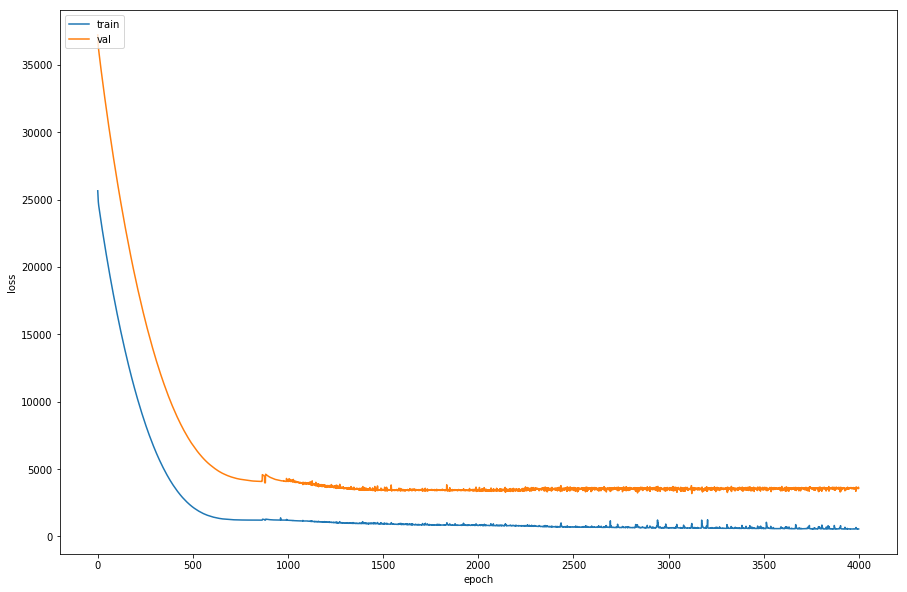

In [107]:
# 5. 학습과정 살펴보기
plt.figure(figsize=(15,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [94]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  534.5696880139802
Validataion Score:  3576.864828330592
Test Score:  3160.1271176545515


In [98]:
pred_out = model.predict(x_train)

In [99]:
pred_out

array([[156.06131 ],
       [131.60893 ],
       [138.15833 ],
       [150.85568 ],
       [150.58768 ],
       [128.62129 ],
       [128.07501 ],
       [134.7515  ],
       [154.46234 ],
       [155.36714 ],
       [148.80243 ],
       [155.6601  ],
       [133.87273 ],
       [140.28383 ],
       [158.70645 ],
       [150.72913 ],
       [149.41283 ],
       [152.4115  ],
       [127.11316 ],
       [130.97115 ],
       [135.88033 ],
       [140.52127 ],
       [157.98    ],
       [149.12886 ],
       [152.68399 ],
       [133.52916 ],
       [152.69334 ],
       [138.184   ],
       [159.89638 ],
       [135.01228 ],
       [168.34593 ],
       [136.7622  ],
       [165.76965 ],
       [151.85149 ],
       [160.89464 ],
       [120.98275 ],
       [132.89056 ],
       [154.0903  ],
       [150.45224 ],
       [165.34608 ],
       [143.09268 ],
       [160.66287 ],
       [120.281166],
       [136.82347 ],
       [144.37779 ],
       [151.88751 ],
       [127.73467 ],
       [131.5

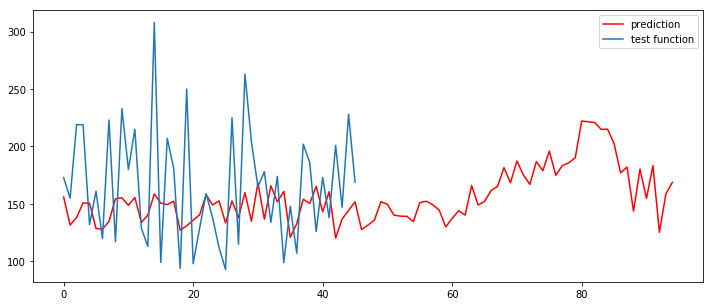

In [110]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(pred_out)),pred_out,'r',label="prediction")
plt.plot(np.arange(46), y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

In [105]:
y_test.shape

(46,)

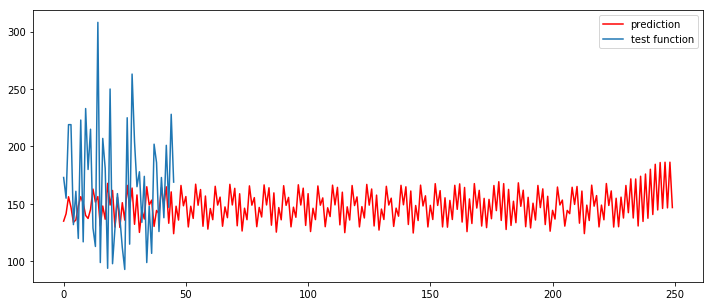

In [106]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(250),predictions,'r',label="prediction")
plt.plot(np.arange(46), y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (250,) and (46,)

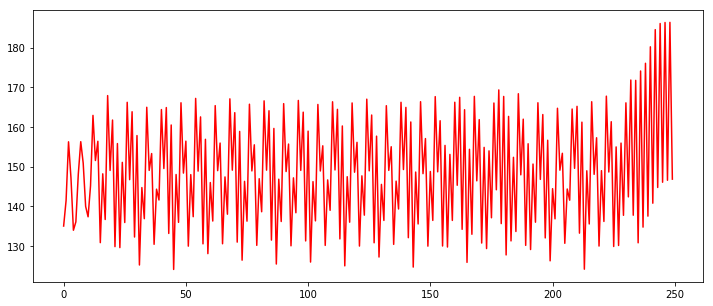

In [97]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))

for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

In [93]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

95/95 [==============================] - 0s 241us/step


IndexError: list index out of range

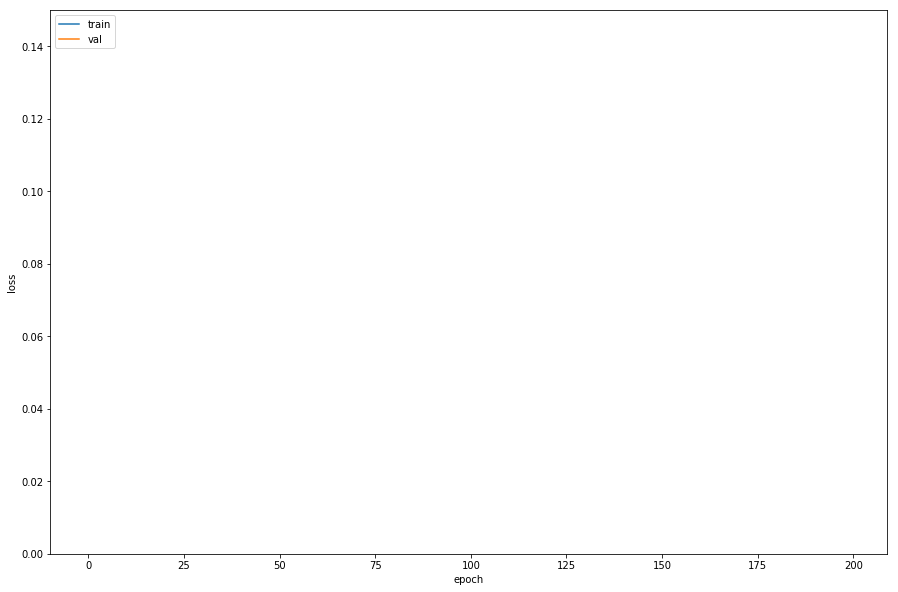

In [48]:
# 5. 학습과정 살펴보기
plt.figure(figsize=(15,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

In [ ]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()